# DATA8001 - Assignment 1

### Student Name: Bernard McNamee
### Student ID: R00207204

## 1. Libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from lib import R00207204_util as util
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import preprocessing
import math
import pickle


## 2. Assignment Variables

In [2]:
STUDENT_ID = 'R00207204'

R00207204_A1_Q1 = 0.0
R00207204_A1_Q2 = {'make':'', 'units':0}
R00207204_A1_Q3 = {'make':'', 'model':'', 'units':0}
R00207204_A1_Q4 = 0.0
R00207204_A1_Q5 = {'make':'', 'price':0}

## 3. Load & Clean Data

In [3]:
df_R00207204 = util.data_etl(STUDENT_ID)
print(df_R00207204.shape)
df_R00207204.head()


cleaning data for R00207204 ...
(3800, 11)


,car_reg,purchase_date,year,month,county,make,model,type,colour,tax_band,price
0,201-D-4698,2020-03-01,2020,1,DUBLIN,MAZDA,MAZDA3,HATCHBACK,RED,B,28244.0
1,202-W-447,2020-10-07,2020,7,WATERFORD,MERCEDES,A-CLASS,HATCHBACK,BLUE,B,38219.0
2,192-D-4872,2019-10-16,2019,10,GALWAY,MAZDA,MAZDA3,SALOON,WHITE,B,33656.0
3,191-L-1071,2019-03-23,2019,3,LIMERICK,OPEL,ASTRA,HATCHBACK,RED,A,31722.0
4,181-C-4177,2018-03-27,2018,3,CORK,MAZDA,CX-5,SUV,WHITE,B,40083.0


In [4]:
df_R00207204.tail()

,car_reg,purchase_date,year,month,county,make,model,type,colour,tax_band,price
3795,202-G-4822,2018-08-20,2018,8,GALWAY,MAZDA,MAZDA6,ESTATE,RED,B,36330.0
3796,201-W-4883,2020-04-03,2020,3,WATERFORD,MERCEDES,C-CLASS,ESTATE,RED,B,44359.0
3797,181-D-3003,2018-11-01,2018,1,DUBLIN,TOYOTA,CAMERY,SALOON,BLUE,B,40352.0
3798,191-W-56,2019-03-18,2019,3,WATERFORD,OPEL,ASTRA,HATCHBACK,WHITE,A,25272.0
3799,191-D-2692,2019-05-16,2019,5,GALWAY,FORD,MONDEO,SALOON,WHITE,B,39459.0


## 4. Visualise Answers

#### Question 1 - What was the median price of cars in 2018 (tax band A & B) in Cork and Galway?

In [5]:
df_copy = df_R00207204.copy()
conditions = df_copy['county'].isin(['CORK','GALWAY']) & df_copy['tax_band'].isin(['A','B'])
R00207204_A1_Q1 = np.median(df_copy['price'][conditions])

In [6]:
print(f'Answer Q1:\t{R00207204_A1_Q1:.2f}')

Answer Q1:	36408.00


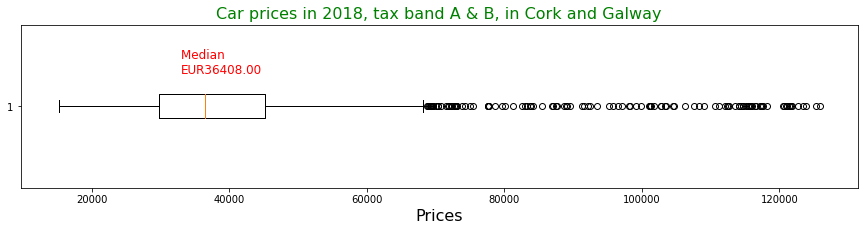

In [7]:
df_plot = df_copy['price'][conditions]
fig = plt.figure(figsize =(15, 3))
ax = fig.add_subplot(111)
ax.tick_params(axis='x')
plt.boxplot(df_plot, vert=False)
plt.xlabel('Prices', fontsize = 16)
plt.title('Car prices in 2018, tax band A & B, in Cork and Galway', fontsize=16, color='green')
text = 'Median \nEUR' + f'{R00207204_A1_Q1:.2f}'
plt.text(33000, 1.2, text, size=12, color='red')
fig.savefig("data/R00207204_A1_Q1.png")
plt.show()

#### Question 2 - What was the most popular MAKE of car in Dublin with a 192-D-XXXX reg plate across tax Bands C and D?

In [8]:
df_copy = df_R00207204.copy()
conditions = df_copy['county'].isin(['DUBLIN']) & df_copy['car_reg'].str.contains('192-D') & df_copy['tax_band'].isin(['C','D'])
R00207204_A1_Q2 = df_copy[conditions].groupby(['make'])['make'].count().reset_index(name='units').head(1).iloc[0]
R00207204_A1_Q2 = df_copy[conditions].groupby(['make'])['make'].count().reset_index(name='units').sort_values('units', ascending=False).head(1).iloc[0]

In [9]:
print(f'Answer Q2:\tMake:{R00207204_A1_Q2["make"]}\t{R00207204_A1_Q2["units"]} units sold')

Answer Q2:	Make:AUDI	6 units sold


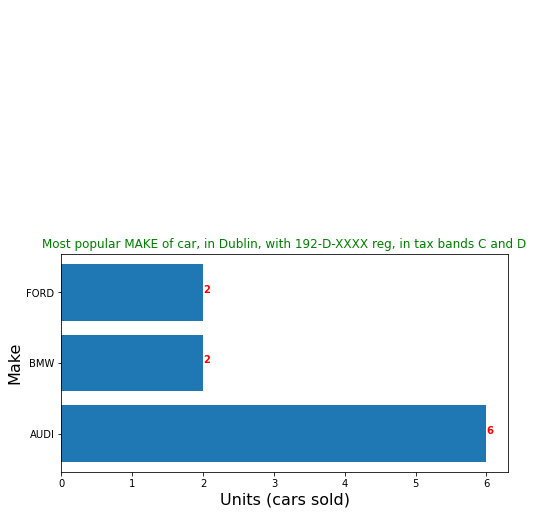

In [10]:
df_plot = df_copy[conditions].groupby(['make'])['make'].count().reset_index(name='units')

fig = plt.figure(figsize =(8, 4))
plt.barh(df_plot['make'], df_plot['units'])
plt.ylabel('Make', fontsize = 16)
plt.xlabel('Units (cars sold)', fontsize = 16)
plt.title('Most popular MAKE of car, in Dublin, with 192-D-XXXX reg, in tax bands C and D', fontsize=12, color='green')
for i, v in enumerate(df_plot['units']):
    plt.text(v, i, str(v), color='red', fontweight='bold')
plt.text(0.5, 5.9, 'Most Popular', size=12, color='white', fontweight='bold')
fig.savefig("data/R00207204_A1_Q2.png")
plt.show()

#### Question 3 - What was the most popular Silver Saloon car (make & model) sold in Limerick & Waterford?

In [11]:
df_copy = df_R00207204.copy()
conditions = (df_copy['colour'] == 'SILVER') & (df_copy['type'] == 'SALOON') & (df_copy['county'].isin(['LIMERICK','WATERFORD']))
max = df_copy[conditions].groupby(['make','model'])['make'].count().iloc[0].item()
df_top_units = df_copy[conditions].groupby(['make','model'])['make'].count().reset_index(name='units')
df_top_units_max = df_top_units[df_top_units['units']==max]
df_top_prices = df_copy[conditions].groupby(['make','model'])['price'].mean().reset_index(name='price')
df_top = pd.merge(df_top_units_max,df_top_prices).sort_values('price',ascending=False)
R00207204_A1_Q3 = df_top.head(1).iloc[0]

In [12]:
print(f'Answer Q3:\tMake:{R00207204_A1_Q3["make"]}\tModel:{R00207204_A1_Q3["model"]}\t{R00207204_A1_Q3["units"]} units sold')

Answer Q3:	Make:AUDI	Model:A4	2 units sold


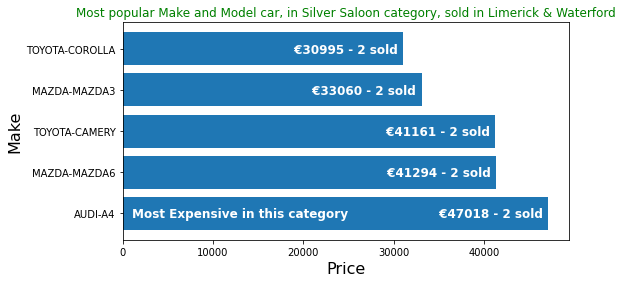

In [13]:
df_top['make + model'] = df_top['make'] + '-' + df_top['model']
df_plot = df_top[['make + model','price','units']]

fig = plt.figure(figsize =(8, 4))
plt.barh(df_plot['make + model'],df_plot['price'])
plt.xlabel('Price', fontsize = 16)
plt.ylabel('Make', fontsize = 16)
plt.title('Most popular Make and Model car, in Silver Saloon category, sold in Limerick & Waterford', fontsize=12, color='green')
for i, v in enumerate(df_plot['price']):
    plt.text(v-12500, i-0.1, ' €'+str(int(v))+' - 2 sold', color='white', size=12, fontweight='bold')
plt.text(1000, -0.1, 'Most Expensive in this category', size=12, color='white', fontweight='bold')
plt.xticks()
fig.savefig("data/R00207204_A1_Q3.png")
plt.show()

#### Question 4 - What was the percentage increase / decrease in total SUV car sales (units) outside of Dublin of 201 vs 192 reg cars?

In [14]:
df_copy = df_R00207204.copy()
conditions201 = (df_copy['county'] != 'DUBLIN') & (df_copy['type'] == 'SUV') & (df_copy['car_reg'].str.contains('201'))
conditions192 = (df_copy['county'] != 'DUBLIN') & (df_copy['type'] == 'SUV') & (df_copy['car_reg'].str.contains('192'))
sales_units_201 = df_copy.loc[conditions201, ['make']].count().item()
sales_units_192 = df_copy.loc[conditions192, ['make']].count().item()

R00207204_A1_Q4 = (sales_units_201 - sales_units_192)/sales_units_192*100

In [15]:
print(f'Answer Q4:\t{R00207204_A1_Q4:.2f}')

Answer Q4:	261.82


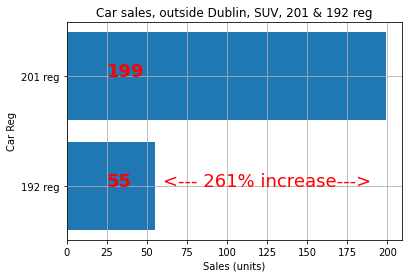

In [16]:
x = ['192 reg', '201 reg']
y = [sales_units_192,sales_units_201]
fig, ax = plt.subplots()
ax.text(60, 0, '<--- ' + str(int(R00207204_A1_Q4)) + '% increase' + '--->', size=18, color='red')
ax.text(25,0, sales_units_192, color='red', fontweight='bold', size=18)
ax.text(25,1, sales_units_201, color='red', fontweight='bold', size=18)
ax.barh(x,y)
ax.set(xlabel='Sales (units)', ylabel='Car Reg', title='Car sales, outside Dublin, SUV, 201 & 192 reg')
ax.grid()
fig.savefig("data/R00207204_A1_Q4.png")
plt.show()

#### Question 5 - What was the most popular make and avg. price of white SUV in Munster in 2020 valued at or above €90K?
**NOTE:** If there is only 1 car for each make, choose the most expensive car make!

In [17]:
df_copy = df_R00207204.copy()
conditions = (df_copy['county'].isin(['WATERFORD', 'LIMERICK', 'CORK'])) & (df_copy['type'] == 'SUV') & (df_copy['colour'] == 'WHITE') & (df_copy['year'] == 2020) & (df_copy['price'] > 90000)
R00207204_A1_Q5['make'] = df_copy[['make','price']][conditions]['make'].mode()[0]
R00207204_A1_Q5['price'] = df_copy[['make','price']][conditions].mean()[0]

In [18]:
print(f'Answer Q5:\tMake:{R00207204_A1_Q5["make"]}\tAvg. Price €{R00207204_A1_Q5["price"]:.2f}')

Answer Q5:	Make:BMW	Avg. Price €110803.50


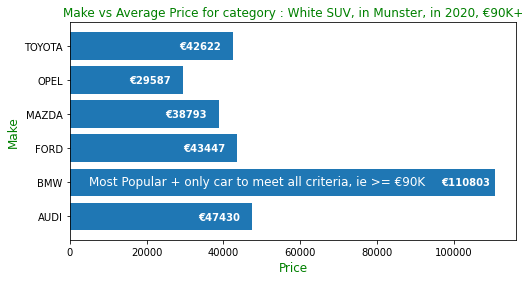

In [19]:
conditions = (df_copy['county'].isin(['WATERFORD', 'LIMERICK', 'CORK'])) & (df_copy['type'] == 'SUV') & (df_copy['colour'] == 'WHITE') & (df_copy['year'] == 2020)

df_plot = df_copy[conditions].groupby(['make'])[['price']].mean().reset_index()

fig = plt.figure(figsize =(8, 4))
plt.barh(df_plot['make'], df_plot['price'])
plt.ylabel('Make', fontsize = 12, color='green')
plt.xlabel('Price', fontsize = 12, color='green')
plt.title('Make vs Average Price for category : White SUV, in Munster, in 2020, €90K+', fontsize=12, color='green')
for i, v in enumerate(df_plot['price']):
    plt.text(v-14000, i-0.1, '€'+str(int(v)), color='white', fontweight='bold')
plt.text(5000, 0.9, 'Most Popular + only car to meet all criteria, ie >= €90K', size=12, color='white')
fig.savefig("data/R00207204_A1_Q2.png")
plt.show()

######################################################################################################################
## 5. Load Model
######################################################################################################################
1. What is the model accuracy?
1. What are the best model features?
1. What is the model equation?
1. What transformations were used (if any)?

## Model v1
##### all features + label encode categorical features
##### all features but 'car_reg' (unique to each record so nothing useful for predictions) + 'purchase_date' (have 'year' + 'month' and stubborn error 'ValueError: y contains previously unseen labels' remains unresolved)
###### 'year','month','type','colour','county','make','model','tax_band'

In [20]:
df_R00207204 = pd.read_csv(f'data/R00207204_processed.csv')

# X variables (independent)
input_features =  ['year','month','county','make','model','type','colour','tax_band']
# create regression model
model1, transformations1, rmse1, r_sq1 = util.train_transform_model(df_R00207204.copy(), input_features, label_on=True, scaler_on=False)

y variable (dependent) - output_feature = price
X variables (independent) - input_features = ['year', 'month', 'county', 'make', 'model', 'type', 'colour', 'tax_band']
Label encoding = True \ Scaler encoding = False 

Splitting dataframe into training and test dataframes 80:20...
Encoding all categorical features used in model to numeric labels...
Creating a linear regression model...
Testing model - calculating RMSE and RSq accuracy score...

RESULTS
- Overall Model Accuracy :: RMSE : 17022 RSq : 0.517 

- Accuracy by Feature :
  RMSE: 17874, R Sq: 0.467 - tax_band
  RMSE: 22788, R Sq: 0.134 - make
  RMSE: 23620, R Sq: 0.07 - model
  RMSE: 24507, R Sq: -0.001 - year
  RMSE: 24519, R Sq: -0.002 - month
  RMSE: 24519, R Sq: -0.002 - colour
  RMSE: 24530, R Sq: -0.003 - type
  RMSE: 24540, R Sq: -0.004 - county

- Best Feature by Accuracy : RMSE: 17874, R Sq: 0.467 - tax_band



/home/barnyard/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Model v2
###### all features + label encode categorical features + scale numeric features
###### 'car_reg','purchase_date','year','month','type','colour','county','make','model','tax_band'

In [21]:
# X variables (independent)
input_features =  ['year','month','county','make','model','type','colour','tax_band']
# create regression model
model2, transformations2, rmse2, r_sq2 = util.train_transform_model(df_R00207204.copy(), input_features, label_on=True, scaler_on=True)

y variable (dependent) - output_feature = price
X variables (independent) - input_features = ['year', 'month', 'county', 'make', 'model', 'type', 'colour', 'tax_band']
Label encoding = True \ Scaler encoding = True 

Splitting dataframe into training and test dataframes 80:20...
Encoding all categorical features used in model to numeric labels...
Creating a linear regression model...
Testing model - calculating RMSE and RSq accuracy score...

RESULTS
- Overall Model Accuracy :: RMSE : 17022 RSq : 0.517 

- Accuracy by Feature :
  RMSE: 17874, R Sq: 0.467 - tax_band
  RMSE: 22788, R Sq: 0.134 - make
  RMSE: 23620, R Sq: 0.07 - model
  RMSE: 24507, R Sq: -0.001 - year
  RMSE: 24519, R Sq: -0.002 - month
  RMSE: 24519, R Sq: -0.002 - colour
  RMSE: 24530, R Sq: -0.003 - type
  RMSE: 24540, R Sq: -0.004 - county

- Best Feature by Accuracy : RMSE: 17874, R Sq: 0.467 - tax_band



/home/barnyard/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Model v3
###### RSq>0 features + label encode categorical features + scale numeric features
###### 'make','model',tax_band'

In [22]:
# X variables (independent)
input_features =  ['make','model','tax_band']
# create regression model
model3, transformations3, rmse3, r_sq3 = util.train_transform_model(df_R00207204.copy(), input_features, label_on=True, scaler_on=False)

y variable (dependent) - output_feature = price
X variables (independent) - input_features = ['make', 'model', 'tax_band']
Label encoding = True \ Scaler encoding = False 

Splitting dataframe into training and test dataframes 80:20...
Encoding all categorical features used in model to numeric labels...
Creating a linear regression model...
Testing model - calculating RMSE and RSq accuracy score...

RESULTS
- Overall Model Accuracy :: RMSE : 17004 RSq : 0.518 

- Accuracy by Feature :
  RMSE: 17874, R Sq: 0.467 - tax_band
  RMSE: 22788, R Sq: 0.134 - make
  RMSE: 23620, R Sq: 0.07 - model

- Best Feature by Accuracy : RMSE: 17874, R Sq: 0.467 - tax_band



/home/barnyard/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Model v4
###### RSq>0 features + label categorical features + scale numeric features + add artificial feature + drop feature
###### 'make','model','tax_band','make_model_type_tax_band'
###### add artificial feature - 'make_model_type_tax_band'
###### drop feature - 'type' feature did nothing to model R Sq

In [23]:
df4 = df_R00207204.copy()
# add new variable make_model_tax_band
df4['make_model_tax_band'] = df4['make'] + '-' + df4['model'] + '-' + df4['tax_band'].astype(str)
# X variables (independent)
input_features =  ['make','model','tax_band','make_model_tax_band'] #
# create regression model
model4, transformations4, rmse4, r_sq4 = util.train_transform_model(df4.copy(), input_features, label_on=True, scaler_on=False)

y variable (dependent) - output_feature = price
X variables (independent) - input_features = ['make', 'model', 'tax_band', 'make_model_tax_band']
Label encoding = True \ Scaler encoding = False 

Splitting dataframe into training and test dataframes 80:20...
Encoding all categorical features used in model to numeric labels...
Creating a linear regression model...
Testing model - calculating RMSE and RSq accuracy score...

RESULTS
- Overall Model Accuracy :: RMSE : 16968 RSq : 0.52 

- Accuracy by Feature :
  RMSE: 17874, R Sq: 0.467 - tax_band
  RMSE: 22788, R Sq: 0.134 - make
  RMSE: 22869, R Sq: 0.128 - make_model_tax_band
  RMSE: 23620, R Sq: 0.07 - model

- Best Feature by Accuracy : RMSE: 17874, R Sq: 0.467 - tax_band



/home/barnyard/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


######################################################################################################################
## Regression Model
######################################################################################################################

In [24]:
# show model features and related co-efficients (slopes)
df_features4 = pd.DataFrame(model4.coef_.flatten(), input_features, columns=['slopes']).reset_index().rename(columns={'index':'feature'})
print(df_features4)

# create model equation with y-intercept and slopes (co-efficients)
print('\nModel equation')
print('y predicted =',int(model4.intercept_[0]),'+',int(model4.coef_[0][0]),'* make','+',int(model4.coef_[0][1]),'* model','+',int(model4.coef_[0][2]),'* tax_band\n')
#,'+',int(model4.coef_[0][3]),'* make_model_type_tax_band

               feature        slopes
0                 make  -8063.310011
1                model   -757.553911
2             tax_band  26004.955667
3  make_model_tax_band   1414.216598

Model equation
y predicted = 34578 + -8063 * make + -757 * model + 26004 * tax_band



\begin{equation}
    \hat{y_i} = w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i3} + w_4x_{i4} \\
    price = w_0 + w_1.make + w_2.model + w_3.tax_band + w_4.makemodeltaxband \\
\end{equation}
The $R^2$ value of 0.226 indicates that 23% of the variability in Y can be explained using X
The large MSE also indicates that the model is not a good prediction model.

#######################################################################################################################
### Validate the model - using test data
#######################################################################################################################

In [25]:
#######################################################################################################################
# Pickle the model & transformations
#######################################################################################################################
# create model transformations
model_trans = util.Data8001(transformations4, model4) # both transformations, model4 from model4 above
print("model transformations created...")
# save the model
pickle.dump(model_trans, open('model/R00207204.pkl', 'wb'))
print("model and transformations saved...")


data8001 initialised ...
model transformations created...
model and transformations saved...


In [26]:
#######################################################################################################################
# Load pickled model file and process unseen test data including any transformations
#######################################################################################################################
# load testing dataset
df_test = pd.read_csv(f'data/{STUDENT_ID}_processed.csv')
# load the model
model_R00207204 = util.load_run_model(STUDENT_ID, df_test)

loading and running the linear regression model for R00207204 ...
Logistic Regression R Squared Accuracy: Score = 0.53


######################################################################################################################
### Normalised dataset - create model on normalised dataset and test new model against original dataset ##############
######################################################################################################################

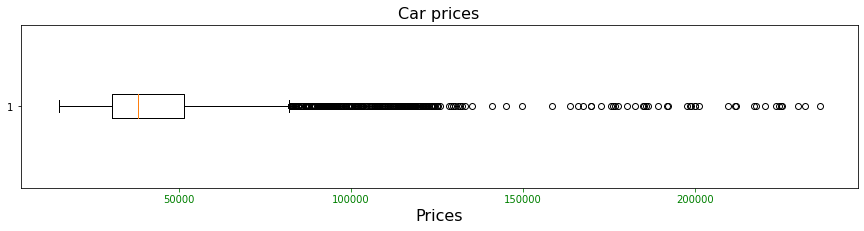

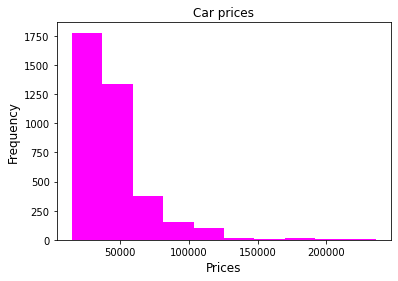

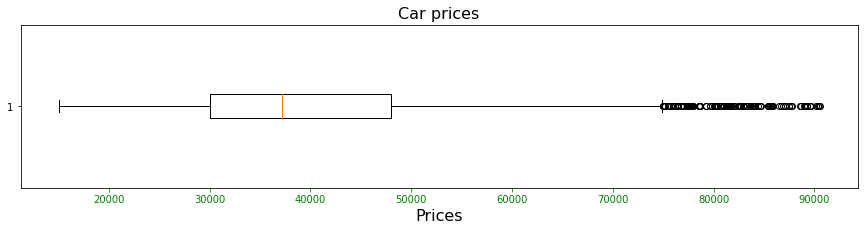

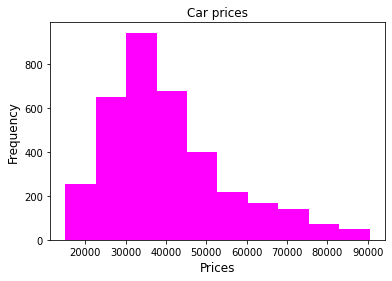

Normalised Model Overall Accuracy with normalised test data
y variable (dependent) - output_feature = price
X variables (independent) - input_features = ['make', 'model', 'tax_band', 'make_model_tax_band']
Label encoding = True \ Scaler encoding = False 

Splitting dataframe into training and test dataframes 80:20...
Encoding all categorical features used in model to numeric labels...
Creating a linear regression model...
Testing model - calculating RMSE and RSq accuracy score...

RESULTS
- Overall Model Accuracy :: RMSE : 8824 RSq : 0.665 

- Accuracy by Feature :
  RMSE: 10576, R Sq: 0.519 - tax_band
  RMSE: 12678, R Sq: 0.309 - make
  RMSE: 12715, R Sq: 0.305 - make_model_tax_band
  RMSE: 14285, R Sq: 0.123 - model

- Best Feature by Accuracy : RMSE: 10576, R Sq: 0.519 - tax_band

Overall "Normalised" Model Accuracy (on Original data) :: RMSE : 18382 RSq : 0.437


/home/barnyard/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/barnyard/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [27]:
# explore full dataset with boxplot and histogram
df1 = df_R00207204.copy()
# display plots
util.show_dataset_plots(df1)

# explore normalised dataset with boxplot and histogram
df5 = df_R00207204.copy()
# remove outliers
df5 = util.remove_outliers(df5)
# display plots
util.show_dataset_plots(df5)

# test normalised model
df5.insert(10,'make_model_tax_band','')
df5['make_model_tax_band'] = df5['make'] + '-' + df5['model'] + '-' + df5['tax_band']
# create and test model with normalised test dataframe df5
print('Normalised Model Overall Accuracy with normalised test data')
model5, transformations5, rmse5, r_sq5 = util.train_transform_model(df5, input_features, label_on=True, scaler_on=False)

output_feature = 'price'
# test normalised model model5 with original test dataframe df4
y_pred1, mse1, rmse6, r_sq6 = util.compare_models(df4,model5,input_features,output_feature)
# compare with original model model1 with original test dataframe df1
print('Overall "Normalised" Model Accuracy (on Original data) :: RMSE :', rmse6, 'RSq :',r_sq6)
